In [1]:
## import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import warning
import warnings
warnings.filterwarnings("ignore")


# <font color ='green'>Step 1: Read & understand the data

In [2]:
## read the data
df_shipment = pd.read_csv("SCMS_Delivery_History_Dataset.csv")
df_shipment.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
# check data size
df_shipment.shape

(10324, 33)

In [3]:
## check data info
df_shipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [8]:
# check statistics for numeric columns
df_shipment.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


# <font color = 'green'> Step 2: Data cleaning

In [10]:
# check for null values
df_shipment.isnull().sum()[df_shipment.isnull().sum()>0]

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64

In [25]:
# find percent null values
null_count = pd.DataFrame(df_shipment.isnull().sum()[df_shipment.isnull().sum()>0], columns=["null_count"])
null_count["percent_null"] = null_count["null_count"]*100/df_shipment.shape[0]
null_count

,null_count,percent_null
Shipment Mode,360,3.487021
Dosage,1736,16.815188
Line Item Insurance (USD),287,2.779930


In [12]:
# get the columns with null values
null_cols = df_shipment.isnull().sum()[df_shipment.isnull().sum()>0].index.to_list()
null_cols

['Shipment Mode', 'Dosage', 'Line Item Insurance (USD)']

In [14]:
# check the null_cols
df_shipment[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Shipment Mode              9964 non-null   object 
 1   Dosage                     8588 non-null   object 
 2   Line Item Insurance (USD)  10037 non-null  float64
dtypes: float64(1), object(2)
memory usage: 242.1+ KB


In [16]:
# check the null_cols
df_shipment[null_cols].tail()

,Shipment Mode,Dosage,Line Item Insurance (USD)
10319,Truck,30/50/60mg,705.79
10320,Truck,150/300mg,161.71
10321,Truck,600/300/300mg,5284.04
10322,Truck,150/300mg,134.03
10323,Truck,30/60mg,85.82


### <font color = 'blue'> Null Columns analysis

In [18]:
# Shipment Mode has around 3.5% null values
df_shipment["Shipment Mode"].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

#### Observation: There are 4 shipment modes with 'Air' mode is dominant. So will impute Na values of the column by it. 

In [28]:
# Dosage has around 17% null values
df_shipment["Dosage"].value_counts()

300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
60/30mg             73
100/25mg            73
600/300mg           63
300/100mg           54
1mg/ml              54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
500/25mg            13
80mg/ml             13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
133.3/33.3m

#### Observation: Dosage column has no any predominant category so will create new category 'Other' and impute NA with it 

In [29]:
#Line Item Insurance (USD) has around 3% null values
df_shipment["Line Item Insurance (USD)"].describe()

count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: Line Item Insurance (USD), dtype: float64

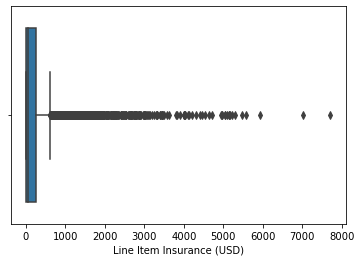

In [32]:
sns.boxplot(x=df_shipment["Line Item Insurance (USD)"])
plt.show()

#### Observation: Line Item Insurance (USD) has many outliers so will impute NA by median as mean will be affected by outliers.

### <font color = 'blue'> Null Columns imputation

In [34]:
# Shipment Mode 
df_shipment["Shipment Mode"] = df_shipment["Shipment Mode"].fillna(df_shipment["Shipment Mode"].mode()[0])

# check nulls for Shipment Mode
df_shipment["Shipment Mode"].isnull().sum()

0

In [39]:
# Shipment Mode 
df_shipment["Dosage"] = df_shipment["Dosage"].fillna('Other')

# check nulls for Shipment Mode
print("Null values in 'Dosage' column = ",df_shipment["Dosage"].isnull().sum())

# Check categories
print("categories in 'Dosage' column are = ",df_shipment["Dosage"].value_counts().index)

Null values in 'Dosage' column =  0
categories in 'Dosage' column are =  Index(['Other', '300mg', '200mg', '600mg', '150/300mg', '150/300/200mg',
       '10mg/ml', '150mg', '200/50mg', '300/300mg', '600/300/300mg',
       '150/200/30mg', '100mg', '50mg', '200/300mg', '80/20mg/ml', '400mg',
       '20mg/ml', '30mg', '600/200/300mg', '150/30mg', '30/50/60mg',
       '300/200mg', '30/60mg', '250mg', '60/30mg', '100/25mg', '600/300mg',
       '300/100mg', '1mg/ml', '20mg', '25mg', '15mg', '30mg/ml',
       '300/150/300mg', '30/50/6mg', '30/6mg', '500/25mg', '80mg/ml',
       '60/100/12mg', '20/120mg', '2g', '500mg', '150/300+200mg',
       '150/300mg+600mg', '133.3/33.3mg', '40mg', '60/12mg', '150/200/40mg',
       '60mg', '125mg', '50+153mg', '600mg/2ml', '50mg/g', '150/300+300mg'],
      dtype='object')


In [40]:
# Shipment Mode 
df_shipment["Line Item Insurance (USD)"] = df_shipment["Line Item Insurance (USD)"].fillna(df_shipment["Line Item Insurance (USD)"].median())

# check nulls for Shipment Mode
df_shipment["Line Item Insurance (USD)"].isnull().sum()

0

In [41]:
## Check null count for dataframe
df_shipment.isnull().sum().sum()

0